In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt

In [5]:
tickers = ['AAPL','GOOGL','BNP','TSLA','MSFT']
new_data = pd.DataFrame()
for t in tickers:
    new_data[t]= pdr.get_data_yahoo(t, start='2017-1-1', end='2022-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2017-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1510 non-null   float64
 1   GOOGL   1510 non-null   float64
 2   BNP     291 non-null    float64
 3   TSLA    1510 non-null   float64
 4   MSFT    1510 non-null   float64
dtypes: float64(5)
memory usage: 70.8 KB


In [7]:
new_data.head()

,AAPL,GOOGL,BNP,TSLA,MSFT
Date,,,,,
2017-01-03,27.095846,40.400501,45.446999,14.466000,57.375919
2017-01-04,27.065519,40.388500,45.446999,15.132667,57.119209
2017-01-05,27.203161,40.651001,45.446999,15.116667,57.119209
2017-01-06,27.506430,41.260502,45.446999,15.267333,57.614296
2017-01-09,27.758373,41.359001,45.446999,15.418667,57.430931


In [10]:
new_data.tail()

,AAPL,GOOGL,BNP,TSLA,MSFT
Date,,,,,
2022-12-23,131.477127,89.230003,NaN,123.150002,237.614105
2022-12-27,129.652435,87.389999,NaN,109.099998,235.852386
2022-12-28,125.674019,86.019997,NaN,112.709999,233.433731
2022-12-29,129.233658,88.449997,NaN,121.820000,239.883438
2022-12-30,129.552719,88.230003,NaN,123.180000,238.699020


## Normalization to 100: help to normalize data to 100 using P1/P0 * 100

In [15]:
new_data.iloc[0]

AAPL     27.095846
GOOGL    40.400501
BNP      45.446999
TSLA     14.466000
MSFT     57.375919
Name: 2017-01-03 00:00:00, dtype: float64

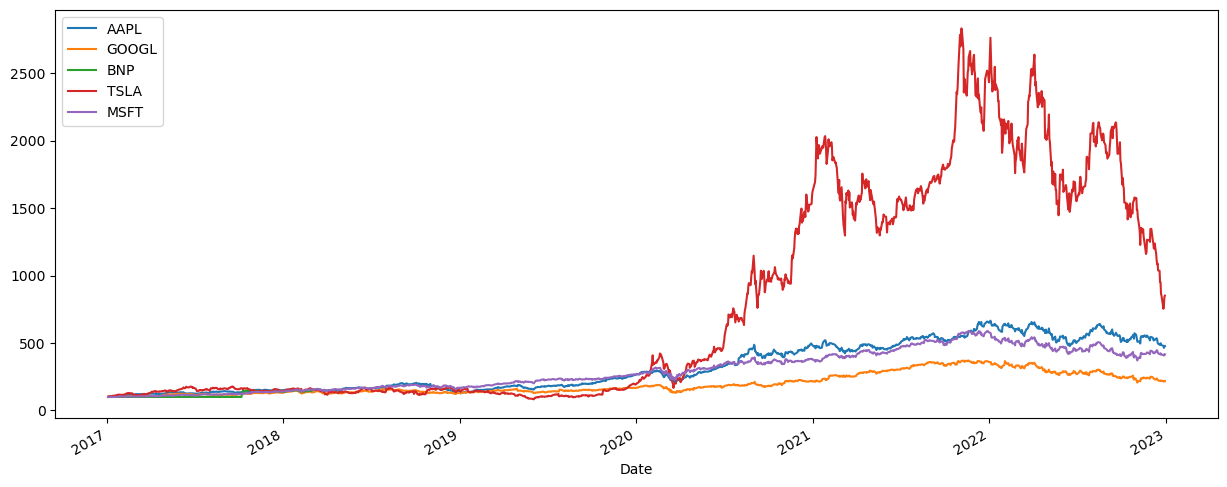

In [18]:
(new_data/new_data.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

In [20]:
new_data.loc['2017-01-03']

AAPL     27.095846
GOOGL    40.400501
BNP      45.446999
TSLA     14.466000
MSFT     57.375919
Name: 2017-01-03 00:00:00, dtype: float64

## Calculate the Rate of Return

In [24]:
returns = (new_data/new_data.shift(1))-1
returns.head()

,AAPL,GOOGL,BNP,TSLA,MSFT
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,-0.000297,0.0,0.046085,-0.004474
2017-01-05,0.005086,0.006499,0.0,-0.001057,0.000000
2017-01-06,0.011148,0.014994,0.0,0.009967,0.008668
2017-01-09,0.009159,0.002387,0.0,0.009912,-0.003183


In [26]:
returns.tail()

,AAPL,GOOGL,BNP,TSLA,MSFT
Date,,,,,
2022-12-23,-0.002798,0.016750,NaN,-0.017551,0.002267
2022-12-27,-0.013878,-0.020621,NaN,-0.114089,-0.007414
2022-12-28,-0.030685,-0.015677,NaN,0.033089,-0.010255
2022-12-29,0.028324,0.028249,NaN,0.080827,0.027630
2022-12-30,0.002469,-0.002487,NaN,0.011164,-0.004937
